In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [ ]:
#leemos el fichero de bmw
df_bmw=pd.read_csv("/content/drive/MyDrive/NUCLIO/14. Entregable 1/bmw_pricing_v3.csv",sep=",")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


# CONTEXTO
## El objetivo de este dataset es predecir el precio del vehículo, para ello en este primer entregable se necesitará realizar todo el data cleaning y data preprocessing de los datos (ojo que si bien el objetivo es predecir el precio no será necesario hacer la predicción)


#PREGUNTA 1
¿Qué columnas eliminaron inicialmente del dataset y por qué?

R:
- Eliminaría la columna 'marca', ya que todos los valores son 'BMW' o Nulos.
- También eliminaría 'asientos_traseros_plegables' ya que la mayoría de valores que tiene son False o Nulos.

(?) Aunque 'fecha_registro' tenga el 50% con valores nulos, capaz es indicativo del precio de los coches, ya que un coche más antiguo tiende a ser más económico que uno mas reciente.


In [ ]:
# ELIMINAR DUPLICADOS
df_bmw.drop_duplicates(inplace=True)

In [ ]:
df_bmw.shape

(4843, 18)

In [ ]:
df_bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [ ]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
#calcular porcentaje de valores nulos de las columnas
percent_missing = df_bmw.isnull().sum() * 100 / len(df_bmw)

In [ ]:
percent_missing

marca                          20.028908
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

In [ ]:
df_bmw['marca'].value_counts()

BMW    3873
Name: marca, dtype: int64

In [ ]:
df_bmw['asientos_traseros_plegables'].value_counts()

False    1150
True      302
Name: asientos_traseros_plegables, dtype: int64

In [ ]:
# Eliminamos columna marca y asientos_traseros_pleagables

In [ ]:
df_bmw.drop(["marca"], axis=1, inplace = True)

In [ ]:
df_bmw.drop(["asientos_traseros_plegables"], axis=1, inplace = True)

In [ ]:
df_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01


#PREGUNTA 2
Manejo de nulos, explicar qué se hizo con los nulos por cada columna

R:

MODELO: Reemplazar el valor nulo por 'desc'

KM: Como no es una distribución normal, reemplazamos el valor por la mediana

POTENCIA: Como no es una distribución normal, reemplazamos el valor por la mediana

FECHA_REGISTRO: Reemplazamos los nulos por 'No info'

TIPO_GASOLINA: Al haber pocos nulos, reemplazamos los valores nulos por la moda de 'tipo_gasolina' por modelo de coche

COLOR: A los valores nulos de la columna color, les ponemos la moda según el modelo.

TIPO_COCHE: A los valores nulos de la columna tipo_coche, les ponemos el valor 'desc'.

VOLANTE_REGULABLE: Aplico la moda del modelo a los valores nulos.

AIRE_ACONDICIONADO: Cambiamos el valor de los nulos por la moda del modelo de coche. Los valores nulos restantes después de esta operación los eliminamos.

CAMARA_TRASERA: Eliminamos los valores nulos porque son muy pocos y no afectara al modelo.

ELEVALUNAS_ELECTRICO: Eliminamos los valores nulos porque son muy pocos y no afectara al modelo.

BLUETOOTH: Reemplazamos valores nulos por la moda del modelo de coche.

GPS: No hay nulos, no hace falta hacer nada.

ALERTA_LIM_VELOCIDAD: Reemplazamos los valores nulos por la moda del modelo de coche del valor nulo. El valor que no se puede completar por falta de datos lo eliminamos.

PRECIO: Reemplazamos los valores nulos por la media de precio según el modelo de coche.

FECHA_VENTA: Sólo hay un valor nulo, podemos permitirnos eliminarlo


In [ ]:
# MODELO: Reemplazar el valor nulo por 'desc'

In [ ]:
df_bmw2 = df_bmw.copy()

In [ ]:
df_bmw2['modelo'].isnull().sum()

3

In [ ]:
df_bmw2["modelo"].fillna('desc', inplace=True)

In [ ]:
df_bmw2['modelo'].isnull().sum()

0

In [ ]:
# KM: Como no es una distribución normal, reemplazamos el valor por la mediana

In [ ]:
df_bmw2['km'].isnull().sum()

2

<Axes: >

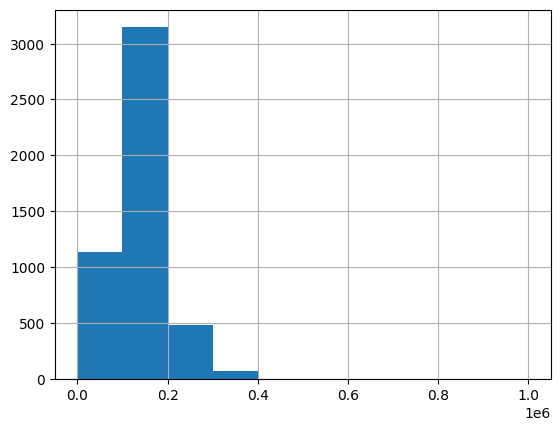

In [ ]:
df_bmw2['km'].hist(bins = 10)

In [ ]:
df_bmw2['km'].fillna(df_bmw2['km'].median, inplace = True)

In [ ]:
df_bmw2['km'].isnull().sum()

0

In [ ]:
# POTENCIA: Como no es una distribución normal, reemplazamos el valor por la mediana

In [ ]:
df_bmw2['potencia'].isnull().sum()

1

<Axes: >

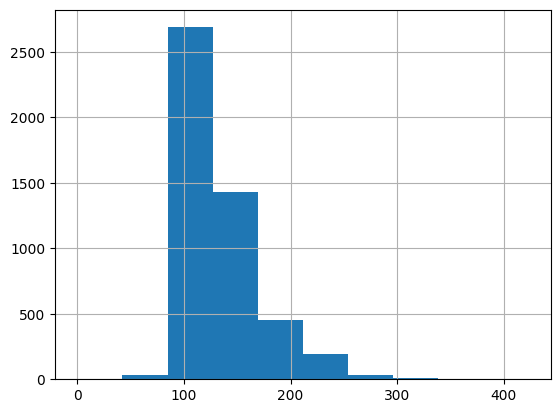

In [ ]:
df_bmw2['potencia'].hist(bins = 10)

In [ ]:
df_bmw2['potencia'].fillna(df_bmw2['potencia'].median, inplace = True)

In [ ]:
df_bmw2['potencia'].isnull().sum()

0

In [ ]:
# FECHA_REGISTRO: Reemplazamos los nulos por 'No info'

In [ ]:
df_bmw2['fecha_registro'].isnull().sum()

2423

In [ ]:
df_bmw2['fecha_registro'].fillna('No info', inplace = True)

In [ ]:
df_bmw2['fecha_registro'].isnull().sum()

0

In [ ]:
# TIPO_GASOLINA: Al haber pocos nulos, reemplazamos los valores nulos por la moda de 'tipo_gasolina' por modelo de coche

In [ ]:
df_bmw2['tipo_gasolina'].value_counts()

diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw2['tipo_gasolina'].isnull().sum()

5

In [ ]:
## Calcula la moda del color para cada modelo
moda_por_modelo = df_bmw2.groupby('modelo')['tipo_gasolina'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

## Reemplaza los nulos en la columna 'Color' con la moda correspondiente al modelo del coche
df_bmw2['tipo_gasolina'] = df_bmw2.apply(lambda row: moda_por_modelo[row['modelo']] if pd.isnull(row['tipo_gasolina']) else row['tipo_gasolina'], axis=1)

In [ ]:
df_bmw2['tipo_gasolina'].isnull().sum()

0

In [ ]:
# COLOR: A los valores nulos de la columna color, les ponemos la moda según el modelo.

In [ ]:
df_bmw2['color'].isnull().sum()

445

In [ ]:
## Calcula la moda del color para cada modelo
moda_por_modelo = df_bmw2.groupby('modelo')['color'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

## Reemplaza los nulos en la columna 'Color' con la moda correspondiente al modelo del coche
df_bmw2['color'] = df_bmw2.apply(lambda row: moda_por_modelo[row['modelo']] if pd.isnull(row['color']) else row['color'], axis=1)


In [ ]:
df_bmw2['color'].isnull().sum() #Sigue habiendo 1 nulo, que implica que el programa no ha podido inputar la moda probablemente por falta de datos.

1

In [ ]:
df_bmw2 = df_bmw2.dropna(subset=['color']) #Eliminamos ese valor

In [ ]:
df_bmw2['color'].isnull().sum()

0

In [ ]:
# TIPO_COCHE: A los valores nulos de la columna tipo_coche, les ponemos el valor 'desc'.

In [ ]:
df_bmw2['tipo_coche'].value_counts()

estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              28
Name: tipo_coche, dtype: int64

In [ ]:
df_bmw2['tipo_coche'].isnull().sum()

1460

In [ ]:
df_bmw2["tipo_coche"].fillna('desc', inplace=True)

In [ ]:
df_bmw2['tipo_coche'].isnull().sum()

0

In [ ]:
# VOLANTE_REGULABLE: Aplico la moda del modelo a los valores nulos.

In [ ]:
df_bmw2['volante_regulable'].isnull().sum()

4

In [ ]:
## Calcula la moda del color para cada modelo
moda_por_modelo = df_bmw2.groupby('modelo')['volante_regulable'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

## Reemplaza los nulos en la columna 'Color' con la moda correspondiente al modelo del coche
df_bmw2['volante_regulable'] = df_bmw2.apply(lambda row: moda_por_modelo[row['modelo']] if pd.isnull(row['volante_regulable']) else row['volante_regulable'], axis=1)

In [ ]:
df_bmw2['volante_regulable'].isnull().sum()

0

In [ ]:
# AIRE_ACONDICIONADO: Cambiamos el valor de los nulos por la moda del modelo de coche. Los valores nulos restantes después de esta operación los eliminamos.

In [ ]:
df_bmw2['aire_acondicionado'].isnull().sum()

486

In [ ]:
df_bmw2['aire_acondicionado'].value_counts()

True     3464
False     892
Name: aire_acondicionado, dtype: int64

In [ ]:
## Calcula la moda del color para cada modelo
moda_por_modelo = df_bmw2.groupby('modelo')['aire_acondicionado'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

## Reemplaza los nulos en la columna 'Color' con la moda correspondiente al modelo del coche
df_bmw2['aire_acondicionado'] = df_bmw2.apply(lambda row: moda_por_modelo[row['modelo']] if pd.isnull(row['aire_acondicionado']) else row['aire_acondicionado'], axis=1)

In [ ]:
df_bmw2['aire_acondicionado'].isnull().sum()

2

In [ ]:
# Aún quedan 2 valores nulos, que puede ser a cause de no tener valores suficientes en otras variables, por lo que decidimos borrar estos nulos.
df_bmw2 = df_bmw2.dropna(subset=['aire_acondicionado'])

In [ ]:
df_bmw2['aire_acondicionado'].isnull().sum()

0

In [ ]:
df_bmw2['aire_acondicionado'].value_counts()

True     3943
False     897
Name: aire_acondicionado, dtype: int64

In [ ]:
# CAMARA_TRASERA: Eliminamos los valores nulos porque son muy pocos y no afectara al modelo.

In [ ]:
df_bmw2['camara_trasera'].isnull().sum()

2

In [ ]:
df_bmw2.dropna(subset = ['camara_trasera'], inplace = True)

<ipython-input-231-96b427829c20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw2.dropna(subset = ['camara_trasera'], inplace = True)


In [ ]:
df_bmw2['camara_trasera'].isnull().sum()

0

In [ ]:
# ELEVALUNAS_ELECTRICO: Eliminamos los valores nulos porque son muy pocos y no afectara al modelo.

In [ ]:
df_bmw2['elevalunas_electrico'].isnull().sum()

2

In [ ]:
df_bmw2.dropna(subset = ['elevalunas_electrico'], inplace = True)

In [ ]:
df_bmw2['elevalunas_electrico'].isnull().sum()

0

In [ ]:
# BLUETOOTH: Reemplazamos valores nulos por la moda del modelo de coche.

In [ ]:
df_bmw2['bluetooth'].isnull().sum()

725

In [ ]:
## Calcula la moda del color para cada modelo
moda_por_modelo = df_bmw2.groupby('modelo')['bluetooth'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

## Reemplaza los nulos en la columna 'Color' con la moda correspondiente al modelo del coche
df_bmw2['bluetooth'] = df_bmw2.apply(lambda row: moda_por_modelo[row['modelo']] if pd.isnull(row['bluetooth']) else row['bluetooth'], axis=1)

In [ ]:
df_bmw2['bluetooth'].isnull().sum()

0

In [ ]:
# GPS: No hay nulos, no hace falta hacer nada.

In [ ]:
df_bmw2['gps'].isnull().sum()

0

In [ ]:
# ALERTA_LIM_VELOCIDAD: Reemplazamos los valores nulos por la moda del modelo de coche del valor nulo. El valor que no se puede completar por falta de datos lo eliminamos.

In [ ]:
df_bmw2['alerta_lim_velocidad'].isnull().sum()

727

In [ ]:
df_bmw2['alerta_lim_velocidad'].value_counts()

True     2235
False    1874
Name: alerta_lim_velocidad, dtype: int64

In [ ]:
## Calcula la moda del color para cada modelo
moda_por_modelo = df_bmw2.groupby('modelo')['alerta_lim_velocidad'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

## Reemplaza los nulos en la columna 'Color' con la moda correspondiente al modelo del coche
df_bmw2['alerta_lim_velocidad'] = df_bmw2.apply(lambda row: moda_por_modelo[row['modelo']] if pd.isnull(row['alerta_lim_velocidad']) else row['alerta_lim_velocidad'], axis=1)

In [ ]:
df_bmw2['alerta_lim_velocidad'].isnull().sum()

1

In [ ]:
# Aún queda un nulo, que se debe a valores incompletos de otras variables que permitan calcular la moda de alerta lim velocidad de cierto modelo de coche. Así que eliminamos este valor.
df_bmw2.dropna(subset = ['alerta_lim_velocidad'], inplace = True)

In [ ]:
df_bmw2['alerta_lim_velocidad'].isnull().sum()

0

In [ ]:
# PRECIO: Reemplazamos los valores nulos por la media de precio según el modelo de coche.

In [ ]:
df_bmw2['precio'].isnull().sum()

6

<Axes: >

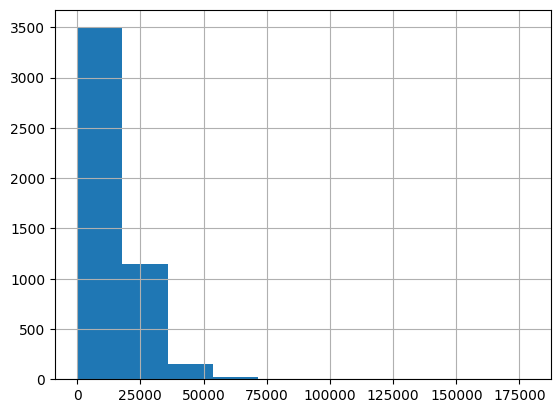

In [ ]:
df_bmw2['precio'].hist(bins = 10)

In [ ]:
media_por_modelo = df_bmw2.groupby('modelo')['precio'].mean()

# Reemplaza los nulos en la columna 'Precio' por la media correspondiente al modelo del coche
df_bmw2['precio'] = df_bmw2.apply(lambda row: media_por_modelo[row['modelo']] if pd.isnull(row['precio']) else row['precio'], axis=1)


In [ ]:
df_bmw2['precio'].isnull().sum()

0

In [ ]:
# FECHA_VENTA: Sólo hay un valor nulo, podemos permitirnos eliminarlo

In [ ]:
df_bmw2['fecha_venta'].isnull().sum()

1

In [ ]:
df_bmw2.dropna(subset=["fecha_venta"], inplace=True)

In [ ]:
df_bmw2['fecha_venta'].isnull().sum()

0

#PREGUNTA 3
Análisis univariable, explicar alguna información interesante encontrada

R:
En la variable 'tipo_gasolina' hay 2 que se llaman igual: Diesel y diesel; por lo que sería razonable juntarlas en una misma. Las variables 'km' y 'potencia' están en tipo object, pero al ser variables numericas, deberíamos transformarlas a tipo float.
Hemos hecho unos histogramas de las variables numericas para detectar a ver si había algún outlier significativo a eliminar, pero no hemos encontrado nada.
Hemos borrado las variables fecha_registro y fecha_venta y hemos creado 2 nuevas variables que contienen solamente el año de registro y de vente


In [ ]:
df_bmw2.isnull().sum()

modelo                  0
km                      0
potencia                0
fecha_registro          0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

In [ ]:
df_bmw3 = df_bmw2.copy()

In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4834 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4834 non-null   object 
 1   km                    4834 non-null   object 
 2   potencia              4834 non-null   object 
 3   fecha_registro        4834 non-null   object 
 4   tipo_gasolina         4834 non-null   object 
 5   color                 4834 non-null   object 
 6   tipo_coche            4834 non-null   object 
 7   volante_regulable     4834 non-null   bool   
 8   aire_acondicionado    4834 non-null   object 
 9   camara_trasera        4834 non-null   object 
 10  elevalunas_electrico  4834 non-null   object 
 11  bluetooth             4834 non-null   bool   
 12  gps                   4834 non-null   bool   
 13  alerta_lim_velocidad  4834 non-null   object 
 14  precio                4834 non-null   float64
 15  fecha_venta          

In [ ]:
df_bmw3.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,desc,True,True,False,True,False,True,False,11300.0,2018-01-01
1,M4,13929.0,317.0,No info,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,desc,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,No info,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,No info,diesel,silver,desc,True,True,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
# AÑADIR Diesel a diesel

In [ ]:
df_bmw3['tipo_gasolina'].value_counts()

diesel           4629
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw3['tipo_gasolina'] = df_bmw3['tipo_gasolina'].str.replace('Diesel', 'diesel')

In [ ]:
df_bmw3['tipo_gasolina'].value_counts()

diesel           4634
petrol            189
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw3['km'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4834 entries, 0 to 4842
Series name: km
Non-Null Count  Dtype 
--------------  ----- 
4834 non-null   object
dtypes: object(1)
memory usage: 75.5+ KB


In [ ]:
# Convierto la columna km de tipo object a tipo float
df_bmw3['km'] = pd.to_numeric(df_bmw3['km'], errors='coerce')

In [ ]:
df_bmw3['km'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4834 entries, 0 to 4842
Series name: km
Non-Null Count  Dtype  
--------------  -----  
4832 non-null   float64
dtypes: float64(1)
memory usage: 75.5 KB


In [ ]:
# Convierto la columna potencia de tipo object a tipo float
df_bmw3['potencia'] = pd.to_numeric(df_bmw3['potencia'], errors='coerce')

In [ ]:
df_bmw3['potencia'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4834 entries, 0 to 4842
Series name: potencia
Non-Null Count  Dtype  
--------------  -----  
4833 non-null   float64
dtypes: float64(1)
memory usage: 75.5 KB


In [ ]:
# Asignamos la columna 'precio' como el target

In [ ]:
target = df_bmw3['precio']

In [ ]:
target = 'precio'
features = df_bmw3.columns[df_bmw3.columns!=target]

In [ ]:
df_bmw3.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4832.0,140985.647972,60187.280237,-64.0,103011.25,141074.0,175239.25,1000376.0
potencia,4833.0,128.922202,38.932322,0.0,100.00,120.0,135.00,423.0
precio,4834.0,15823.928956,9217.301789,100.0,10800.00,14200.0,18600.00,178500.0


In [ ]:
# Función para crear listas de variables según su tipo:

In [ ]:
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]
  for i in dataset:
    if (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2 and i not in target:
      lista_numericas.append(i)
    elif (dataset[i].dtype.kind in ("f","i", "O")) and len(dataset[i].unique())== 2 and i not in target:
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind == "O") and i not in target:
      lista_categoricas.append(i)
  return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw3)

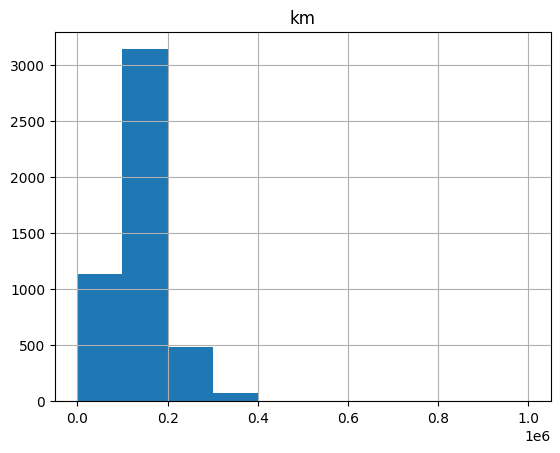

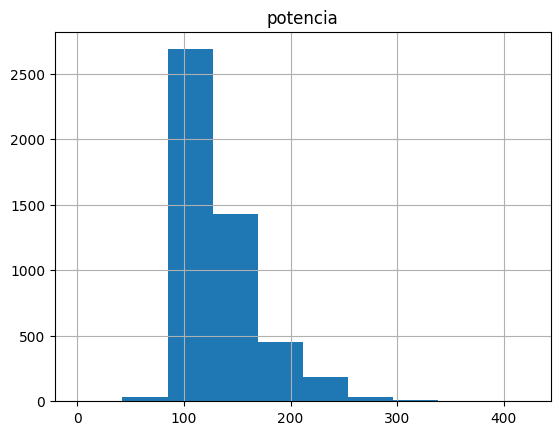

In [ ]:
for i in lista_numericas:
  df_bmw3.hist(i, bins = 10)

In [ ]:
for i in lista_categoricas:
  print(df_bmw3[i].value_counts())

320                752
520                632
318                568
X3                 438
116                358
                  ... 
ActiveHybrid 5       1
i8                   1
630                  1
635                  1
214 Gran Tourer      1
Name: modelo, Length: 73, dtype: int64
No info       2419
2013-07-01      93
2014-03-01      83
2014-05-01      80
2013-01-01      78
              ... 
2007-01-01       1
1990-03-01       1
2006-11-01       1
1994-01-01       1
2005-09-01       1
Name: fecha_registro, Length: 181, dtype: int64
diesel           4634
petrol            189
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64
black     1845
grey      1148
blue       659
white      485
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64
desc           1459
estate         1104
sedan           821
suv             755
hatchback       487
subcompact       77
coupe            75
convertible  

In [ ]:
# Los modelos de coche menos frecuentes los podemos añadir en un mismo grupo que se llame 'otros'
def obten_lista_otros(dataset, columna, umbral):
  lista_otros= []
  tabla=dataset[columna].value_counts().reset_index()
  print(tabla)
  for i in range(0,len(tabla)):
    if (tabla.iloc[i][columna]) < umbral:
      lista_otros.append(tabla.iloc[i]["index"])
  return lista_otros

In [ ]:
def cambiar_a_otros(dataset, otros):
  dataset.replace({i:otros}, inplace=True)

In [ ]:
lista_cambiar = obten_lista_otros(df_bmw3, "modelo", 10)

              index  modelo
0               320     752
1               520     632
2               318     568
3                X3     438
4               116     358
..              ...     ...
68   ActiveHybrid 5       1
69               i8       1
70              630       1
71              635       1
72  214 Gran Tourer       1

[73 rows x 2 columns]


In [ ]:
for i in lista_cambiar:
  cambiar_a_otros(df_bmw3, "Otros")

In [ ]:
df_bmw3['modelo'].value_counts()

320                  752
520                  632
318                  568
X3                   438
116                  358
X1                   274
316                  234
X5                   231
525                  183
530                  157
Otros                148
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   44
120                   36
330                   33
420 Gran Coupé        33
730                   33
520 Gran Turismo      23
325                   19
640 Gran Coupé        19
530 Gran Turismo      18
740                   18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
Name: modelo, dtype: int64

In [ ]:
# Creamos nueva variable año_registro con solo el año como infrmación del coche.
# Reemplazar 'No info' por NaT (dato falta)
df_bmw3 = df_bmw3.replace('No info', pd.NaT)

df_bmw3['fecha_registro'] = pd.to_datetime(df_bmw3['fecha_registro'])

# Extraer año, cualquier valor NaT devuelve NaN
df_bmw3['año_registro'] = df_bmw3['fecha_registro'].dt.year

# Rellenamos Nan valor
df_bmw3 = df_bmw3.fillna({'año_registro': -1})

In [ ]:
# Borramos columna fecha_registro
del(df_bmw3['fecha_registro'])

In [ ]:
# Hacemos el mismo proceso pero con el año de venta del coche.
# Reemplazar 'No info' por NaT (dato falta)
df_bmw3 = df_bmw3.replace('No info', pd.NaT)

df_bmw3['fecha_venta'] = pd.to_datetime(df_bmw3['fecha_venta'])

# Extraer año, cualquier valor NaT devuelve NaN
df_bmw3['año_venta'] = df_bmw3['fecha_venta'].dt.year

# Rellenamos Nan valor
df_bmw3 = df_bmw3.fillna({'año_venta': -1})

In [ ]:
# Borramos columna fecha_venta
del(df_bmw3['fecha_venta'])

In [ ]:
df_bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,Otros,True,True,False,True,False,True,False,11300.0,2012.0,2018
1,Otros,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,-1.0,2018
2,320,183297.0,120.0,diesel,white,Otros,False,False,False,True,False,True,False,10200.0,2012.0,2018
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,-1.0,2018
4,Otros,97097.0,160.0,diesel,silver,Otros,True,True,False,False,True,True,True,33400.0,-1.0,2018


In [ ]:
df_bmw3['color'].value_counts()

black     1845
grey      1148
blue       659
white      485
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

#PREGUNTA 4
Análisis de correlación inicial, ¿Hay alguna variable correlacionada?

R: No hay ninguna variable correlacionada.


In [ ]:
df_bmw4 = df_bmw3.copy()

In [ ]:
corr = df_bmw4.corr()
corr.style.background_gradient()

<ipython-input-293-0e1e61030849>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_bmw4.corr()


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
km,1.000000,-0.049007,0.065975,0.017172,0.001938,0.046875,-0.034441,0.153890,-0.022682,-0.409082,-0.003326,-0.032406
potencia,-0.049007,1.000000,0.326827,0.183633,0.313599,0.341960,0.228228,0.009351,0.504841,0.638833,0.013431,-0.001758
volante_regulable,0.065975,0.326827,1.000000,0.286398,0.254361,0.278933,0.134297,0.244913,0.244893,0.268475,-0.001232,-0.000195
aire_acondicionado,0.017172,0.183633,0.286398,1.000000,0.142707,0.257661,0.103945,0.343647,0.206537,0.225879,0.032343,-0.013623
camara_trasera,0.001938,0.313599,0.254361,0.142707,1.000000,0.199647,0.134022,0.061818,0.195944,0.252346,0.000902,0.014366
elevalunas_electrico,0.046875,0.341960,0.278933,0.257661,0.199647,1.000000,0.238611,0.203051,0.338484,0.261537,0.003369,-0.002266
bluetooth,-0.034441,0.228228,0.134297,0.103945,0.134022,0.238611,1.000000,0.117822,0.098844,0.200037,0.014184,0.014826
gps,0.153890,0.009351,0.244913,0.343647,0.061818,0.203051,0.117822,1.000000,-0.052335,-0.005172,0.017779,-0.007711
alerta_lim_velocidad,-0.022682,0.504841,0.244893,0.206537,0.195944,0.338484,0.098844,-0.052335,1.000000,0.432880,0.016911,-0.010399
precio,-0.409082,0.638833,0.268475,0.225879,0.252346,0.261537,0.200037,-0.005172,0.432880,1.000000,0.019066,0.013907


In [ ]:
corr.stack()

km         km                      1.000000
           potencia               -0.049007
           volante_regulable       0.065975
           aire_acondicionado      0.017172
           camara_trasera          0.001938
                                     ...   
año_venta  gps                    -0.007711
           alerta_lim_velocidad   -0.010399
           precio                  0.013907
           año_registro            0.001486
           año_venta               1.000000
Length: 144, dtype: float64

#PREGUNTA 5
Análisis variable vs target, ¿Hay algún insight interesante?

R: Podemos ver que hay un outlier en la variable 'km' porque pone que el mínimo es -64. También hay un outlier en la variable 'potencia' con el valor de 0. Eliminamos de nuestro dataset los dos valores.

In [ ]:
df_bmw5 = df_bmw4.copy()

In [ ]:
target = 'precio'
features = df_bmw5.columns[df_bmw5.columns!=target]

In [ ]:
df_bmw5.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4832.0,140985.647972,60187.280237,-64.0,103011.25,141074.0,175239.25,1000376.0
potencia,4833.0,128.922202,38.932322,0.0,100.00,120.0,135.00,423.0
precio,4834.0,15823.928956,9217.301789,100.0,10800.00,14200.0,18600.00,178500.0
año_registro,4834.0,1004.919942,1006.858355,-1.0,-1.00,-1.0,2013.00,2017.0
año_venta,4834.0,2017.992139,0.275077,2007.0,2018.00,2018.0,2018.00,2018.0


In [ ]:
# Vemos que el mínimo de la variable 'km' es -64.

In [ ]:
df_bmw5.loc[df_bmw5['km'] < 0, 'km']

2938   -64.0
Name: km, dtype: float64

In [ ]:
# Como sólo hay un valor negativo, lo eliminamos.

In [ ]:
df_bmw5 = df_bmw5[df_bmw5['km'] > 0]

In [ ]:
df_bmw5.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4831.0,141014.844753,60159.278613,476.0,103049.0,141080.0,175243.5,1000376.0
potencia,4830.0,128.887371,38.907201,0.0,100.0,120.0,135.0,423.0
precio,4831.0,15809.992253,9180.374152,100.0,10800.0,14200.0,18600.0,178500.0
año_registro,4831.0,1005.127924,1006.858676,-1.0,-1.0,-1.0,2013.0,2017.0
año_venta,4831.0,2017.992134,0.275163,2007.0,2018.0,2018.0,2018.0,2018.0


In [ ]:
# Hay un valor con una potencia de 0, que parece ser una outlier. Lo eliminamos también.

In [ ]:
df_bmw5.loc[df_bmw5['potencia'] == 0, 'potencia']

3765    0.0
Name: potencia, dtype: float64

In [ ]:
df_bmw5 = df_bmw5[df_bmw5.potencia != 0]

In [ ]:
df_bmw5.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4830.0,141027.110766,60159.465286,476.0,103067.25,141084.5,175247.75,1000376.0
potencia,4829.0,128.914061,38.866983,25.0,100.00,120.0,135.00,423.0
precio,4830.0,15810.843183,9181.134109,100.0,10800.00,14200.0,18600.00,178500.0
año_registro,4830.0,1004.919048,1006.858237,-1.0,-1.00,-1.0,2013.00,2017.0
año_venta,4830.0,2017.992133,0.275191,2007.0,2018.00,2018.0,2018.00,2018.0


#PREGUNTA 6
Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar?

R: Van a transformar 'modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',



In [ ]:
df_bmw6 = df_bmw5.copy()

In [ ]:
df_bmw6.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,Otros,True,True,False,True,False,True,False,11300.0,2012.0,2018
1,Otros,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,-1.0,2018
2,320,183297.0,120.0,diesel,white,Otros,False,False,False,True,False,True,False,10200.0,2012.0,2018
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,-1.0,2018
4,Otros,97097.0,160.0,diesel,silver,Otros,True,True,False,False,True,True,True,33400.0,-1.0,2018


In [ ]:
df_bmw6['modelo'].value_counts()

320                  752
520                  631
318                  568
X3                   437
116                  358
X1                   273
316                  234
X5                   231
525                  183
530                  157
Otros                148
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   44
120                   36
330                   33
420 Gran Coupé        33
730                   33
520 Gran Turismo      23
325                   19
740                   18
530 Gran Turismo      18
640 Gran Coupé        18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
Name: modelo, dtype: int64

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw6)

In [ ]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [ ]:
df_bmw62=pd.get_dummies(data=df_bmw6,
                               columns=lista_categoricas
                               )

In [ ]:
df_bmw62.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_white,tipo_coche_Otros,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,True,True,False,True,False,True,False,11300.0,...,0,1,0,0,0,0,0,0,0,0
1,13929.0,317.0,True,True,False,False,True,True,True,69700.0,...,0,0,1,0,0,0,0,0,0,0
2,183297.0,120.0,False,False,False,True,False,True,False,10200.0,...,1,1,0,0,0,0,0,0,0,0
3,128035.0,135.0,True,True,False,True,True,True,True,25100.0,...,0,0,1,0,0,0,0,0,0,0
4,97097.0,160.0,True,True,False,False,True,True,True,33400.0,...,0,1,0,0,0,0,0,0,0,0


#PREGUNTA 7
Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

R: No hay ninguna variable finalmente correlacionada.

In [ ]:
df_bmw7 = df_bmw62.copy()

In [ ]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_bmw7[variable_transformar]=minMaxResultado.fit_transform(df_bmw7[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw7)

In [ ]:
for i in lista_numericas:
  print(i)

km
potencia
año_registro
año_venta


In [ ]:
for i in lista_numericas:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [ ]:
df_bmw7.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_white,tipo_coche_Otros,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.139949,0.188442,True,True,False,True,False,True,False,11300.0,...,0,1,0,0,0,0,0,0,0,0
1,0.013454,0.733668,True,True,False,False,True,True,True,69700.0,...,0,0,1,0,0,0,0,0,0,0
2,0.182839,0.238693,False,False,False,True,False,True,False,10200.0,...,1,1,0,0,0,0,0,0,0,0
3,0.127572,0.276382,True,True,False,True,True,True,True,25100.0,...,0,0,1,0,0,0,0,0,0,0
4,0.096631,0.339196,True,True,False,False,True,True,True,33400.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_bmw7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4842
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4830 non-null   float64
 1   potencia                     4829 non-null   float64
 2   volante_regulable            4830 non-null   bool   
 3   aire_acondicionado           4830 non-null   bool   
 4   camara_trasera               4830 non-null   bool   
 5   elevalunas_electrico         4830 non-null   bool   
 6   bluetooth                    4830 non-null   bool   
 7   gps                          4830 non-null   bool   
 8   alerta_lim_velocidad         4830 non-null   bool   
 9   precio                       4830 non-null   float64
 10  año_registro                 4830 non-null   float64
 11  año_venta                    4830 non-null   float64
 12  modelo_114                   4830 non-null   uint8  
 13  modelo_116        

In [ ]:
corr = df_bmw7.corr()

In [ ]:
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [ ]:
#Stack sirve para hacer una transpuesta a una columna
corr2.stack()

km                     potencia               -0.048543
                       volante_regulable       0.066248
                       aire_acondicionado      0.016995
                       camara_trasera          0.001593
                       elevalunas_electrico    0.046278
                                                 ...   
tipo_coche_sedan       tipo_coche_suv         -0.194493
                       tipo_coche_van         -0.032618
tipo_coche_subcompact  tipo_coche_suv         -0.054743
                       tipo_coche_van         -0.009181
tipo_coche_suv         tipo_coche_van         -0.031024
Length: 2278, dtype: float64

In [ ]:
#borramos nulos
corr3=corr2.unstack().dropna()

In [ ]:
corr4 = corr3.sort_values()

In [ ]:
corr4

tipo_gasolina_petrol  tipo_gasolina_diesel       -0.970958
color_grey            color_black                -0.438606
precio                km                         -0.408083
tipo_coche_estate     tipo_coche_Otros           -0.357930
tipo_gasolina_diesel  modelo_Otros               -0.330859
                                                    ...   
tipo_coche_coupe      modelo_420                  0.446207
tipo_coche_suv        modelo_X3                   0.482767
alerta_lim_velocidad  potencia                    0.504520
tipo_coche_van        modelo_218 Active Tourer    0.553144
precio                potencia                    0.639034
Length: 2278, dtype: float64

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta,modelo_114,modelo_116,modelo_118,modelo_120,modelo_218,modelo_218 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_330,modelo_420,modelo_420 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_525,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_640 Gran Coupé,modelo_730,modelo_740,modelo_M550,modelo_Otros,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X6,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_Otros,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
km,1.000000,-0.048543,0.066248,0.016995,0.001593,0.046278,-0.034823,0.153588,-0.022496,-0.408083,-0.003609,-0.032408,-0.062389,-0.108682,-0.012300,-0.009896,-0.073792,-0.036435,0.002233,0.060227,0.006755,0.098573,-0.018594,-0.015950,-0.011012,-0.087427,-0.081938,0.029030,0.092785,-0.003302,0.097000,0.070057,0.048508,0.026434,-0.020560,0.013931,-0.014788,0.000062,-0.125739,-0.058478,-0.035463,-0.097222,-0.037384,-0.024875,-0.026355,0.045454,-0.037499,-0.034954,-0.034554,-0.009257,0.037172,-0.022506,-0.021955,0.041647,0.027290,-0.030646,-0.025603,0.024729,-0.067808,0.002695,-0.033581,-0.050340,0.132825,-0.096651,0.061171,-0.030413,-0.092201,-0.066047
potencia,-0.048543,1.000000,0.326066,0.182246,0.313744,0.342296,0.228843,0.006593,0.504520,0.639034,0.014984,-0.001767,-0.082227,-0.317958,-0.114975,0.007501,-0.029643,-0.031045,-0.255740,-0.260292,-0.099115,-0.030998,0.014248,0.046442,0.121975,0.008119,0.009109,-0.078631,-0.013814,-0.004258,0.112048,0.270895,0.087838,0.248776,0.159101,0.103865,0.160413,0.194040,0.253615,-0.116897,0.045032,0.063083,0.347043,0.096125,0.207703,-0.116764,-0.023896,0.026033,0.117582,-0.019849,0.025596,-0.001374,-0.053807,-0.016432,-0.004398,0.011574,-0.008953,0.013346,0.009486,-0.010918,0.021333,0.106501,-0.042879,-0.180900,0.028688,-0.134055,0.198465,-0.047063
volante_regulable,0.066248,0.326066,1.000000,0.285911,0.253913,0.278713,0.134125,0.244361,0.244320,0.268268,-0.000817,-0.000205,-0.061589,-0.193087,-0.119099,-0.037571,-0.038354,-0.033232,-0.128836,-0.096708,-0.045261,-0.095137,-0.013921,0.023715,0.019602,0.012442,0.029704,0.063658,0.173515,0.056642,0.092665,0.100413,0.034940,0.061898,0.055426,0.070114,0.055426,0.028511,0.042824,-0.097110,0.055201,0.058875,0.144609,0.053859,0.082513,0.007965,0.005892,0.016448,-0.012390,-0.025367,0.006910,0.015420,0.039839,0.010163,0.047575,0.008335,-0.033088,-0.015351,-0.100807,-0.024963,0.045164,0.026316,0.003794,-0.116626,0.058478,-0.090619,0.082542,-0.033206
aire_acondicionado,0.016995,0.182246,0.285911,1.000000,0.142345,0.257381,0.103735,0.342634,0.205973,0.226063,0.032908,-0.013627,-0.069209,-0.152087,-0.102316,-0.039274,-0.019049,0.014469,-0.038952,0.011804,0.030226,-0.043831,0.002236,-0.012632,-0.012244,-0.021635,0.020114,0.042320,0.134130,0.032966,0.047109,0.069319,0.020400,0.046218,0.020400,0.039529,0.029148,0.023785,0.001218,-0.107275,-0.009504,0.019289,0.074335,0.028324,0.040085,0.082898,0.011881,0.006302,-0.088024,0.011302,0.004529,0.001230,0.048217,-0.023885,0.031919,0.001673,-0.045078,-0.036155,-0.048671,-0.022220,-0.043746,-0.039314,0.080416,-0.068800,0.059320,-0.109588,-0.009458,0.004660
camara_trasera,0.001593,0.313744,0.253913,0.142345,1.000000,0.198820,0.133513,0.061381,0.195429,0.253924,0.000903,0.014361,-0.018756,-0.102699,-0.035958,-0.007515,-0.014697,-0.016129,-0.084481,-0.098428,-0.024067,-0.069037,0.009707,-0.015071,0.021006,-0.026426,0.027273,0.003132,0.004420,0.055238,0.057142,0.076766,0.062469,0.080245,0.070941,0.096204,0.079412,0.047518,0.051473,-0.026814,0.019734,-0.001417,0.1

#PREGUNTA 8
Subir un pantallazo con el nombre de TODAS las columnas que tiene el dataframe final final vfin y el tipo de dato que tiene, tip lo más sencillo es hacer un .info al dataframe y tomarle un pantallazo y subirlo, importante deben aparecer TODAS las columnas

R:

In [ ]:
df_bmw8 = df_bmw7.copy()

In [ ]:
df_bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4842
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4830 non-null   float64
 1   potencia                     4829 non-null   float64
 2   volante_regulable            4830 non-null   bool   
 3   aire_acondicionado           4830 non-null   bool   
 4   camara_trasera               4830 non-null   bool   
 5   elevalunas_electrico         4830 non-null   bool   
 6   bluetooth                    4830 non-null   bool   
 7   gps                          4830 non-null   bool   
 8   alerta_lim_velocidad         4830 non-null   bool   
 9   precio                       4830 non-null   float64
 10  año_registro                 4830 non-null   float64
 11  año_venta                    4830 non-null   float64
 12  modelo_114                   4830 non-null   uint8  
 13  modelo_116        

#PREGUNTA 8
Exportar en un excel de las primeras 50 filas del dataset (df.to_excel(...)


In [ ]:
df_bmw8.to_excel('/content/drive/MyDrive/NUCLIO/14. Entregable 1/df_bmw.xlsx')

#PREGUNTA 9
Sube el programa (el archivo .ipynb, NO EL PICKLE de lo contrario me quedaré sin espacio...) y con esto hemos terminado ;)